## Dataset



This data set includes hourly air pollutants data from 12 nationally-controlled air-quality monitoring sites. The air-quality data are from the Beijing Municipal Environmental Monitoring Center. The meteorological data in each air-quality site are matched with the nearest weather station from the China Meteorological Administration. The time period is from March 1st, 2013 to February 28th, 2017. Missing data are denoted as NA.

**Attributes Information:**

* No: row number
* year: year of data in this row
* month: month of data in this row
* day: day of data in this row
* hour: hour of data in this row
* PM2.5: PM2.5 concentration (ug/m^3)
* PM10: PM10 concentration (ug/m^3)
* SO2: SO2 concentration (ug/m^3)
* NO2: NO2 concentration (ug/m^3)
* CO: CO concentration (ug/m^3)
* O3: O3 concentration (ug/m^3)
* TEMP: temperature (degree Celsius)
* PRES: pressure (hPa)
* DEWP: dew point temperature (degree Celsius)
* RAIN: precipitation (mm)
* wd: wind direction
* WSPM: wind speed (m/s)
* station: name of the air-quality monitoring site

**Dataset source:** https://archive.ics.uci.edu/dataset/501/beijing+multi+site+air+quality+data

In [ ]:
#@title Download Dataset
#!wget -qq https:// (load you dataset)
print("Dataset downloaded successfully!!")

Dataset downloaded successfully!!


In [ ]:
!pip -qq install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 86.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 104.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 14.5 MB/s eta 0:00:00


### Import required Packages

In [ ]:
import warnings
warnings.simplefilter('ignore')
import pmdarima as pm
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from scipy.special import expit, logit
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX

### Load the data and analyze

In [ ]:
path = "PRSA_Data_Nongzhanguan_20130301_20170228.csv"
df = pd.read_csv(path)
df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
3,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,14.0,21.0,3.0,27.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Nongzhanguan
35060,35061,2017,2,28,20,18.0,27.0,3.0,37.0,400.0,59.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Nongzhanguan
35061,35062,2017,2,28,21,15.0,39.0,5.0,50.0,600.0,41.0,10.8,1014.2,-13.3,0.0,NW,1.1,Nongzhanguan
35062,35063,2017,2,28,22,11.0,35.0,6.0,49.0,500.0,41.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Nongzhanguan


In [ ]:
df['DATE'] = pd.to_datetime(df[['year', 'month','day','hour']])
df.set_index('DATE',drop=True, inplace=True)
df.fillna(0, inplace=True)

In [ ]:
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
DATE,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
2013-03-01 01:00:00,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2013-03-01 02:00:00,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
2013-03-01 03:00:00,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
2013-03-01 04:00:00,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan


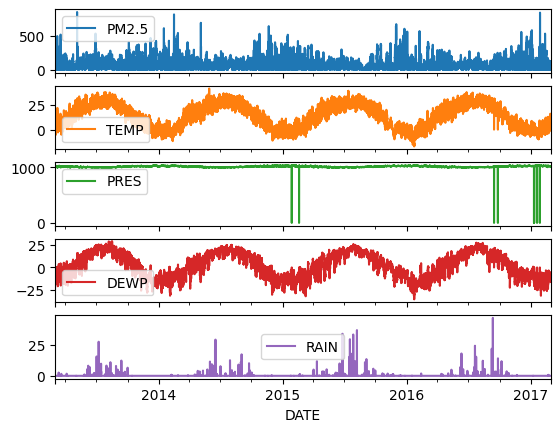

In [ ]:
# plotting multiple weather related variables with PM2.5
multi_data = df[['PM2.5', 'TEMP', 'PRES', 'DEWP', 'RAIN']]
multi_data.plot(subplots=True)
plt.show()

<Axes: xlabel='y(t)', ylabel='y(t + 10)'>

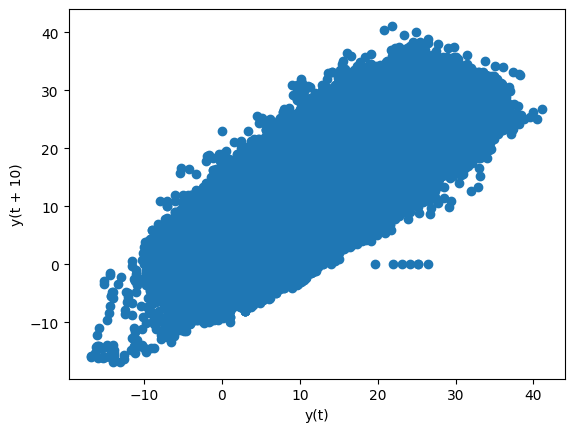

In [ ]:
pd.plotting.lag_plot(df['TEMP'], lag=10)

#### Pair plot between Features

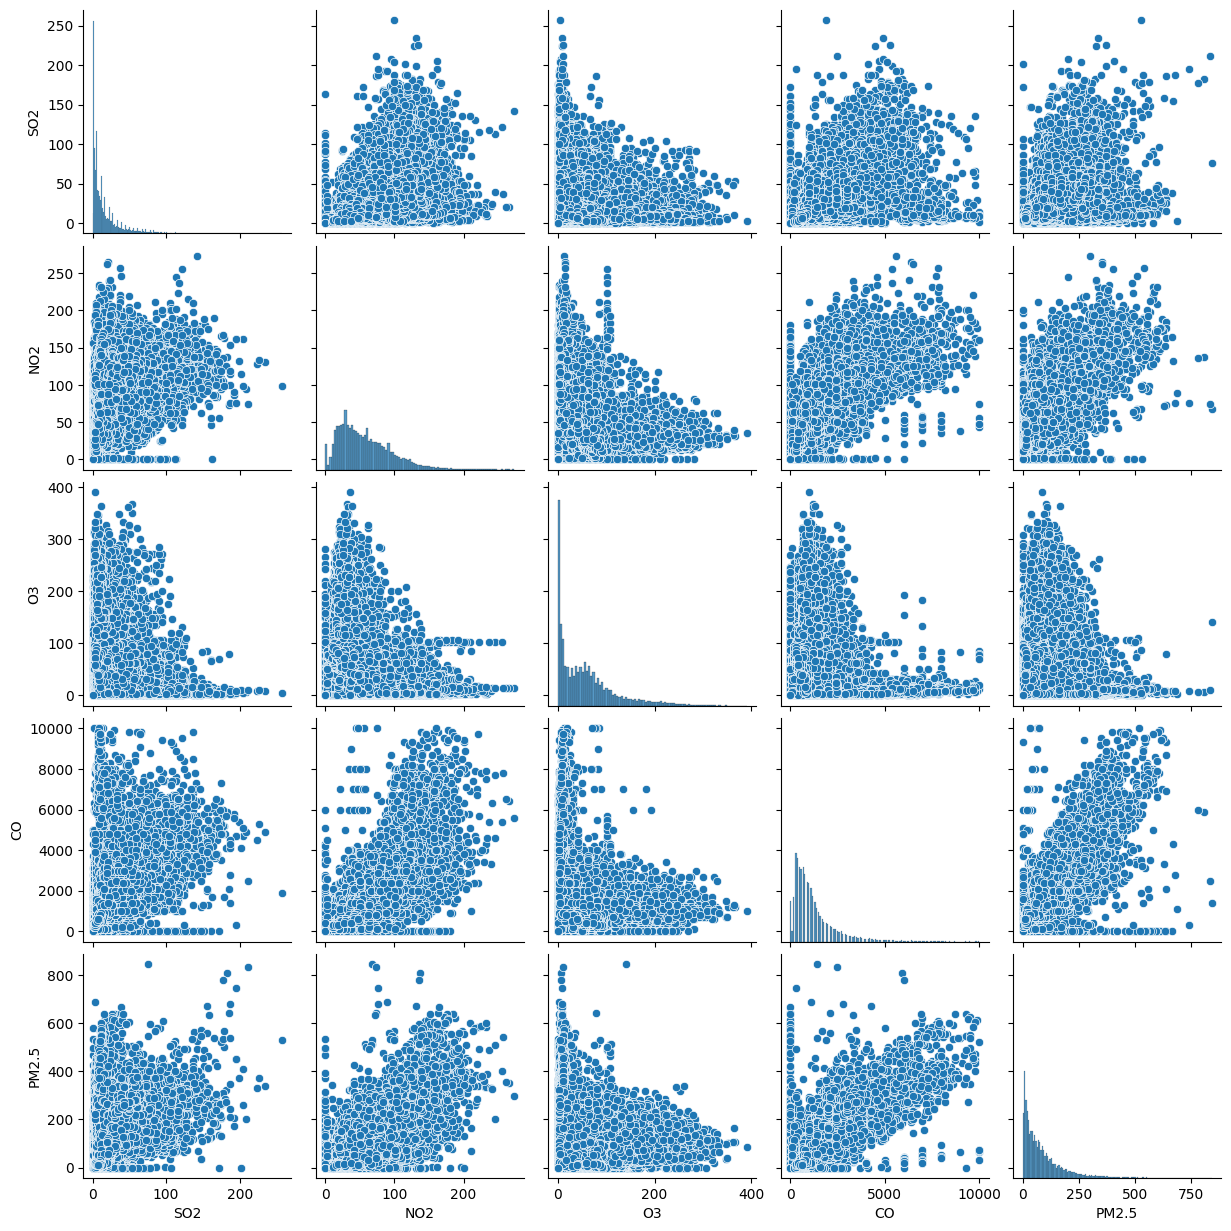

In [ ]:
import seaborn as sns
g = sns.pairplot(df[['SO2','NO2','O3','CO', 'PM2.5']])

By this we can observe the correlation between the features.

We can also find the values of correlation by using pearson correlation matrix.

### Correlation plot between Features

In [ ]:
aq_pear_corr = df[['SO2','NO2','O3','CO','PM10', 'PM2.5']].corr(method='pearson')
aq_pear_corr

,SO2,NO2,O3,CO,PM10,PM2.5
SO2,1.000000,0.498420,-0.181287,0.548073,0.520864,0.530707
NO2,0.498420,1.000000,-0.487559,0.687939,0.671140,0.681005
O3,-0.181287,-0.487559,1.000000,-0.290256,-0.149587,-0.178473
CO,0.548073,0.687939,-0.290256,1.000000,0.719420,0.786448
PM10,0.520864,0.671140,-0.149587,0.719420,1.000000,0.901004
PM2.5,0.530707,0.681005,-0.178473,0.786448,0.901004,1.000000


<Axes: >

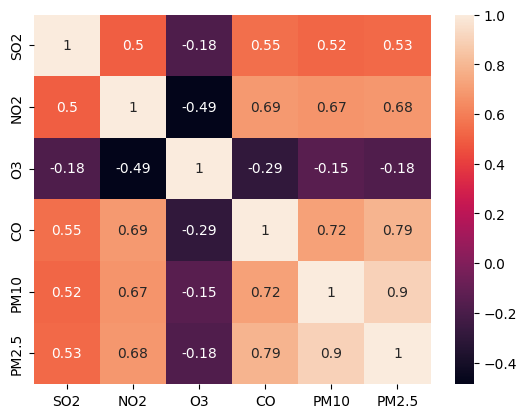

In [ ]:
sns.heatmap(aq_pear_corr,annot=True)

Thus, we can interpret that $PM_{2.5}$ is higly correlated with $CO$ and $PM_{10}$ and moderately correlated with $NO_{2}$.

In [ ]:
aq_df_na = df.copy()
aq_df_na = aq_df_na.dropna()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

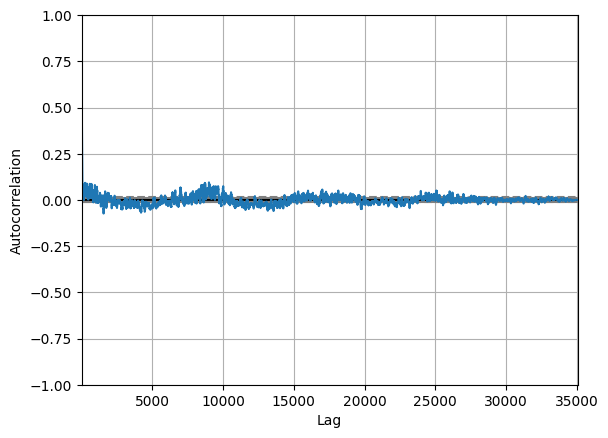

In [ ]:
pd.plotting.autocorrelation_plot(aq_df_na['PM2.5'])

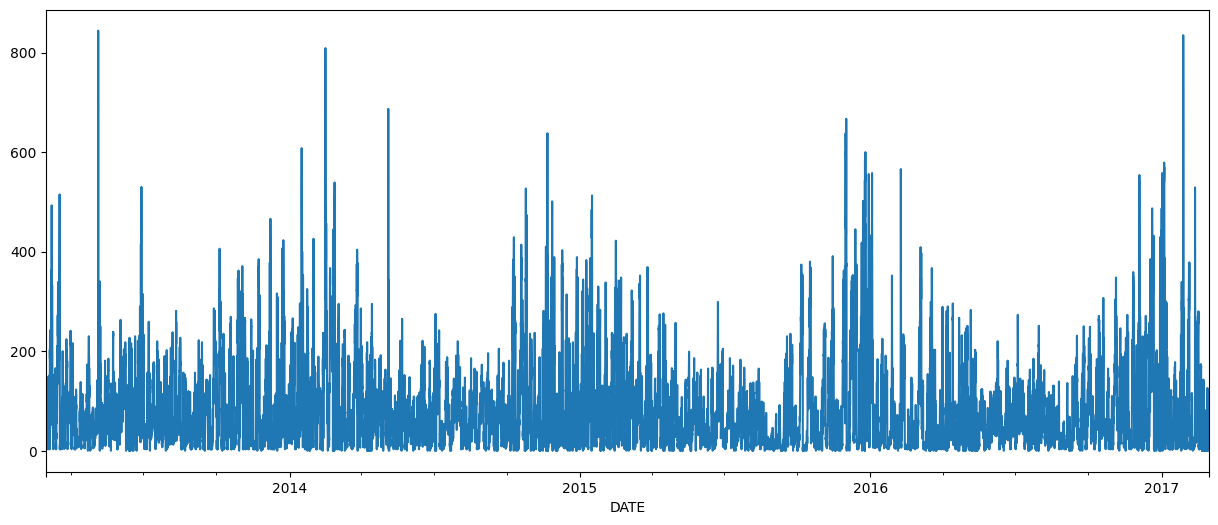

In [ ]:
df['PM2.5'].plot(figsize=(15,6))
plt.show()

### Identify the trends and seasonality from the given time series data


In [ ]:
df['PM2.5'].fillna(0, inplace=True)
df['PM2.5']

,PM2.5
DATE,
2013-03-01 00:00:00,5.0
2013-03-01 01:00:00,8.0
2013-03-01 02:00:00,3.0
2013-03-01 03:00:00,5.0
2013-03-01 04:00:00,5.0
...,...
2017-02-28 19:00:00,14.0
2017-02-28 20:00:00,18.0
2017-02-28 21:00:00,15.0


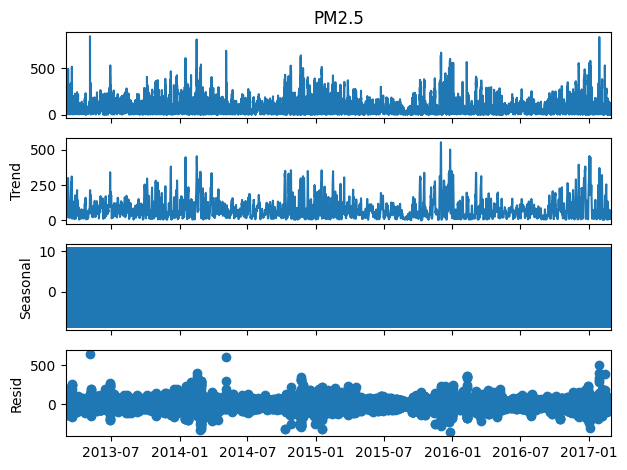

In [ ]:
# The statsmodels library provides a suite of functions for working with time series data
from statsmodels.tsa.seasonal import seasonal_decompose
df['PM2.5'].fillna(0, inplace=True)
ts = df['PM2.5']

# ETS Decomposition
result = seasonal_decompose(ts)

# ETS plot
result.plot();

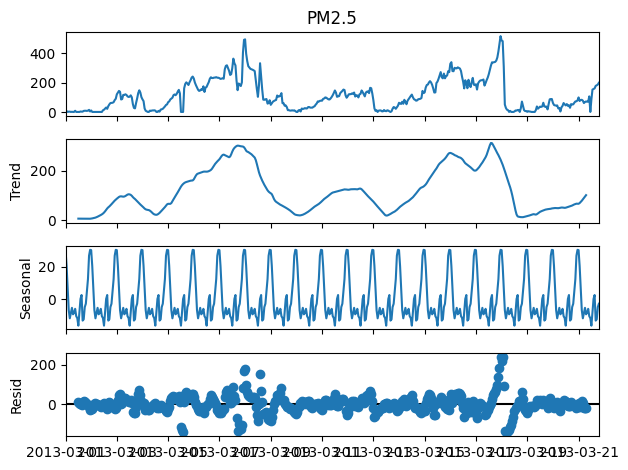

In [ ]:
# ETS Decomposition
result = seasonal_decompose(ts[:500])

# ETS plot
result.plot();

### Time Series Stationarity

Check the Stationarity of time series using:
  * Dickey Fuller test
  * Rolling mean and Rolling standard deviation

Make the timeseries stationary

* Apply Log transformation and **Differencing** of the timeseries to make it stationary

Verify the stationarity with the Dickey Fuller test

In [ ]:
# Let’s create a function to run the test which determines whether a given time series is stationary
def get_stationarity(timeseries):
    # Rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()

    # Rolling statistics plot
    plt.figure(figsize=(15,5))
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

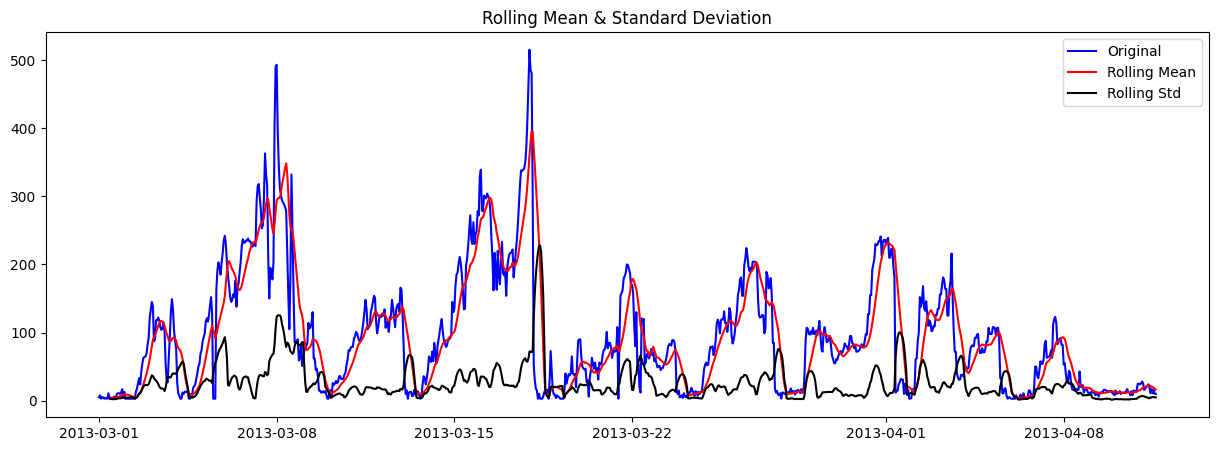

In [ ]:
get_stationarity(df['PM2.5'][:1000])

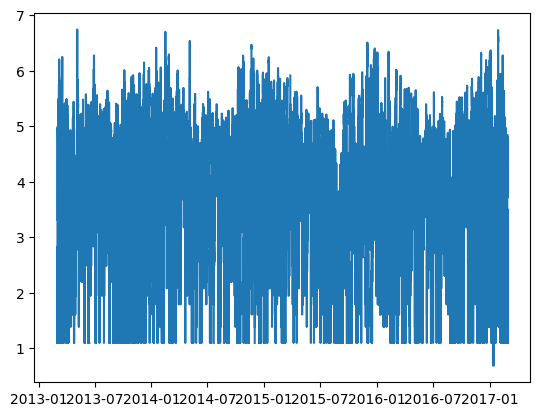

In [ ]:
# ESTIMATING THE TREND
# Applying a log transformation is a way to reduce the variance of the series
df_log = np.log(df['PM2.5'])
plt.plot(df_log);

In [ ]:
print(df_log.min())
df_log.replace(-np.inf, 0,inplace=True)
df_log.min()

-inf


0.0

Eliminating the Trend and Seasonality by **Differencing** (taking the difference with a particular time lag)

In [ ]:
shift_df = pd.concat([df_log, df_log.shift(1)],axis=1)
shift_df.columns = ['Actual','Forecasted']
shift_df.head()

,Actual,Forecasted
DATE,,
2013-03-01 00:00:00,1.609438,NaN
2013-03-01 01:00:00,2.079442,1.609438
2013-03-01 02:00:00,1.098612,2.079442
2013-03-01 03:00:00,1.609438,1.098612
2013-03-01 04:00:00,1.609438,1.609438


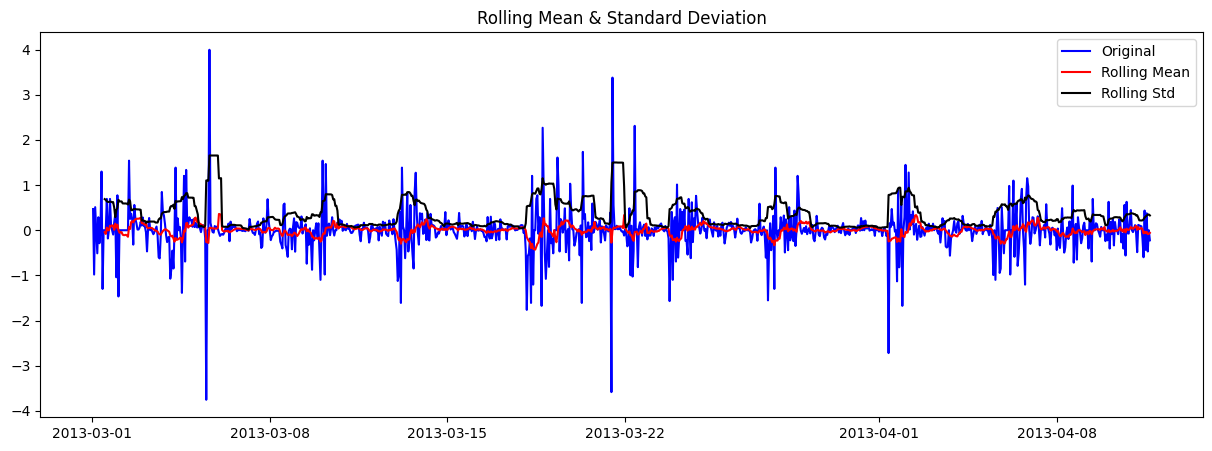

In [ ]:
df_log_shift = shift_df['Actual'] - shift_df['Forecasted']
df_log_shift.dropna(inplace=True)
get_stationarity(df_log_shift[:1000])

In [ ]:
#Perform Dickey Fuller test
result = adfuller(df_log)
print('ADF Stastistic: %f'%result[0])
print('p-value: %f'%result[1])
pvalue = result[1]
for key,value in result[4].items():
  if result[0]>value:
    print("The graph is non stationery")
    break
  else:
    print("The graph is stationary")
    break;
print('Critical values:')
for key,value in result[4].items():
    print('\t%s: %.3f ' % (key, value))

ADF Stastistic: -21.883699
p-value: 0.000000
The graph is stationary
Critical values:
	1%: -3.431 
	5%: -2.862 
	10%: -2.567 


### Auto Correlation Plot Analysis
* Plot ACF and PACF graphs
* Analyse and identify the ARIMA (p, d, q) terms

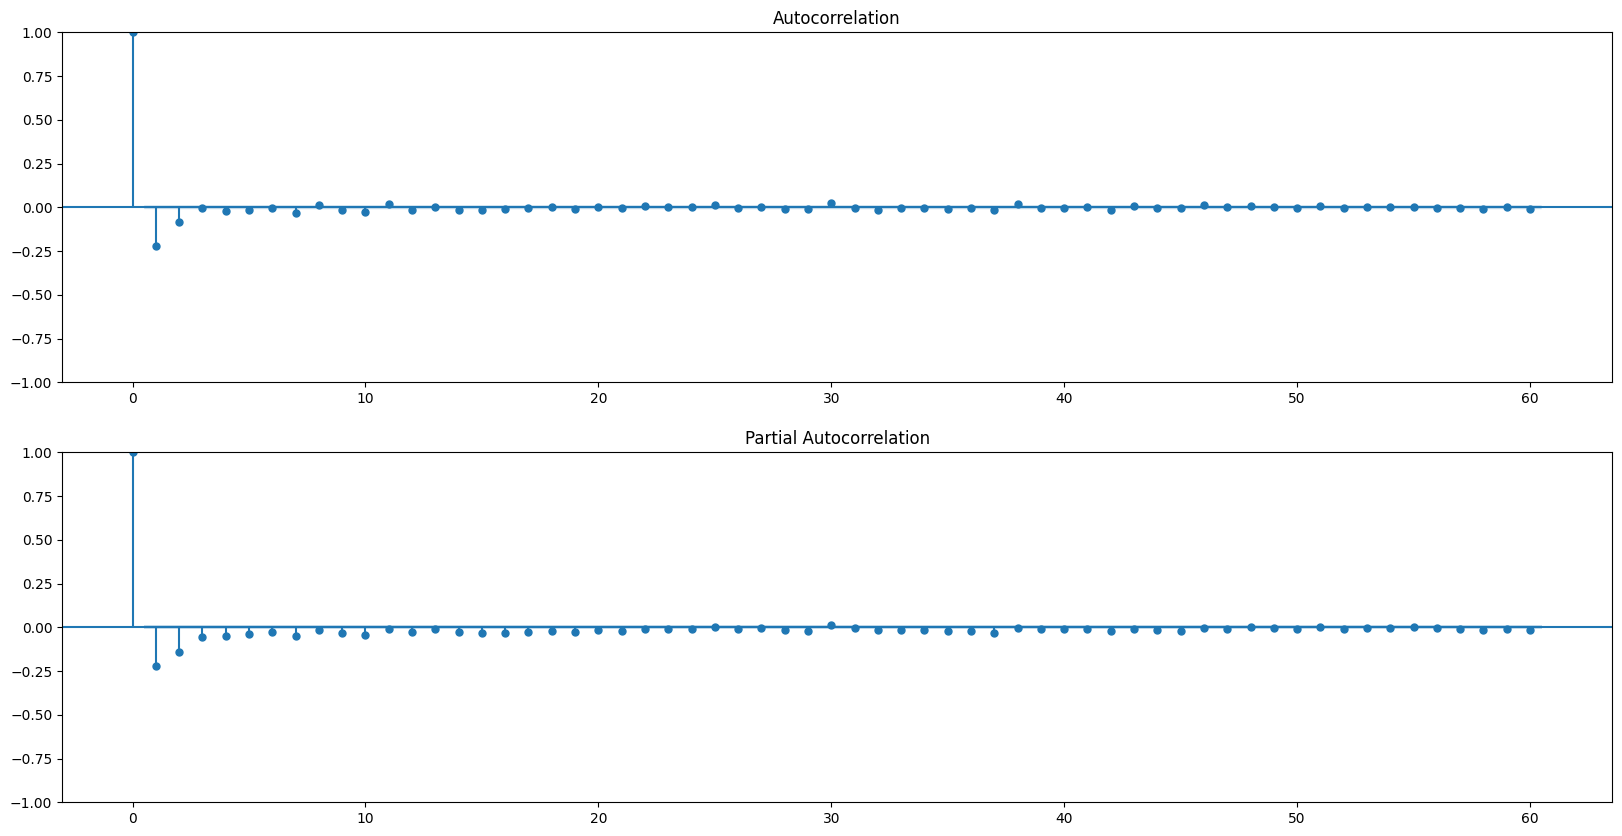

In [ ]:
# let us plot acf and pacf graphs
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plt.figure(figsize = (20,10))
plt.subplot(211)
plot_acf(df_log_shift, ax=plt.gca(), lags = 60)
plt.subplot(212)
plot_pacf(df_log_shift, ax=plt.gca(), lags = 60)
plt.show()

In [ ]:
df_log = pd.DataFrame(df_log)
df_log.reset_index(inplace=True)
df_log.DATE = pd.to_datetime(df_log.DATE)
df_log.set_index('DATE',inplace=True)
df_log

,PM2.5
DATE,
2013-03-01 00:00:00,1.609438
2013-03-01 01:00:00,2.079442
2013-03-01 02:00:00,1.098612
2013-03-01 03:00:00,1.609438
2013-03-01 04:00:00,1.609438
...,...
2017-02-28 19:00:00,2.639057
2017-02-28 20:00:00,2.890372
2017-02-28 21:00:00,2.708050


In [ ]:
# split the data into train and test
train_ar = df_log[:int(len(df_log)*0.9)]
test_ar = df_log[int(len(df_log)*0.9):]

In [ ]:
train_ar.tail(),test_ar.head()

(                        PM2.5
 DATE                         
 2016-10-05 16:00:00  4.110874
 2016-10-05 17:00:00  4.043051
 2016-10-05 18:00:00  4.248495
 2016-10-05 19:00:00  4.290459
 2016-10-05 20:00:00  4.465908,
                         PM2.5
 DATE                         
 2016-10-05 21:00:00  4.543295
 2016-10-05 22:00:00  4.564348
 2016-10-05 23:00:00  4.682131
 2016-10-06 00:00:00  4.700480
 2016-10-06 01:00:00  4.564348)

In [ ]:
len(train_ar), len(test_ar)

(31557, 3507)

### Implement ARIMA model
* Fit the timeseries data with ARIMA
* Find and interpret the loss (AIC)

In [ ]:
# ARIMA Method - 1
from math import sqrt
from sklearn.metrics import mean_squared_error
# ARIMA model
# order (2,1,2) based on auto_arima performed above
model = ARIMA(train_ar, order=(2,1,2) )
model_fit = model.fit()
print(model_fit.aic)
predictions = model_fit.predict(start=test_ar.index[0],end=test_ar.index[-1])
error = sqrt(mean_squared_error(test_ar, predictions))
print('RMSE value: %.3f' % error)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


53013.12231948248
RMSE value: 1.456


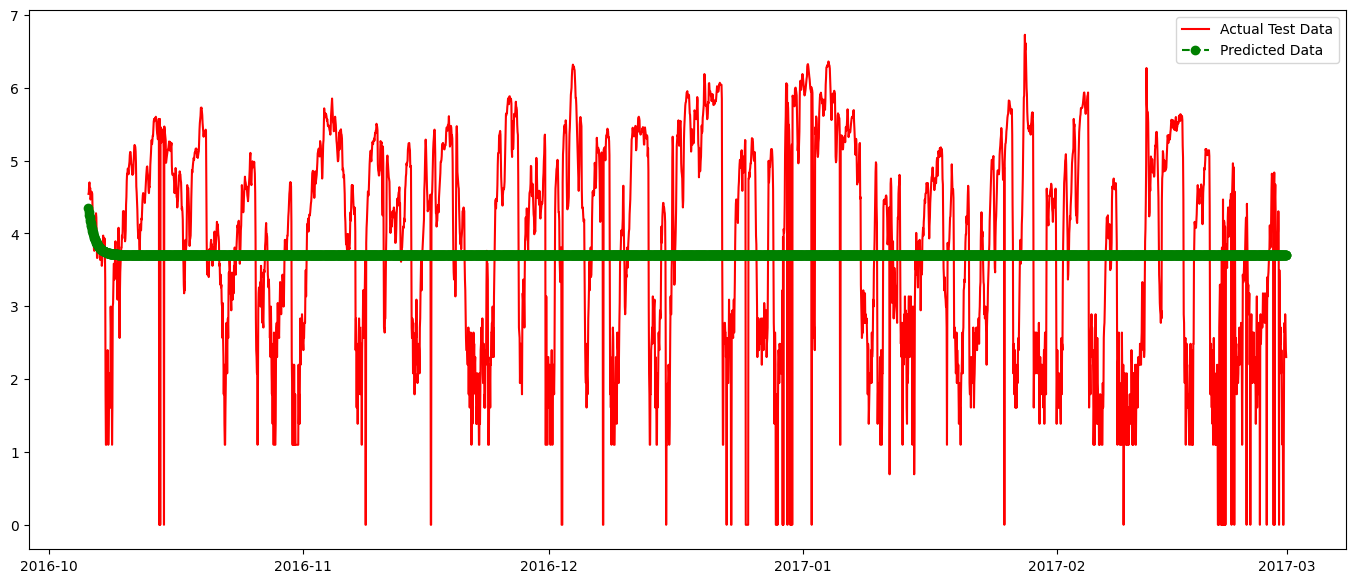

In [ ]:
plt.figure(figsize=(17,7))
plt.plot(test_ar.index, test_ar, color='red', label='Actual Test Data')
plt.plot(test_ar.index, predictions, color='green',marker='o', linestyle='dashed', label='Predicted Data')
plt.legend();

### Plot the predictions

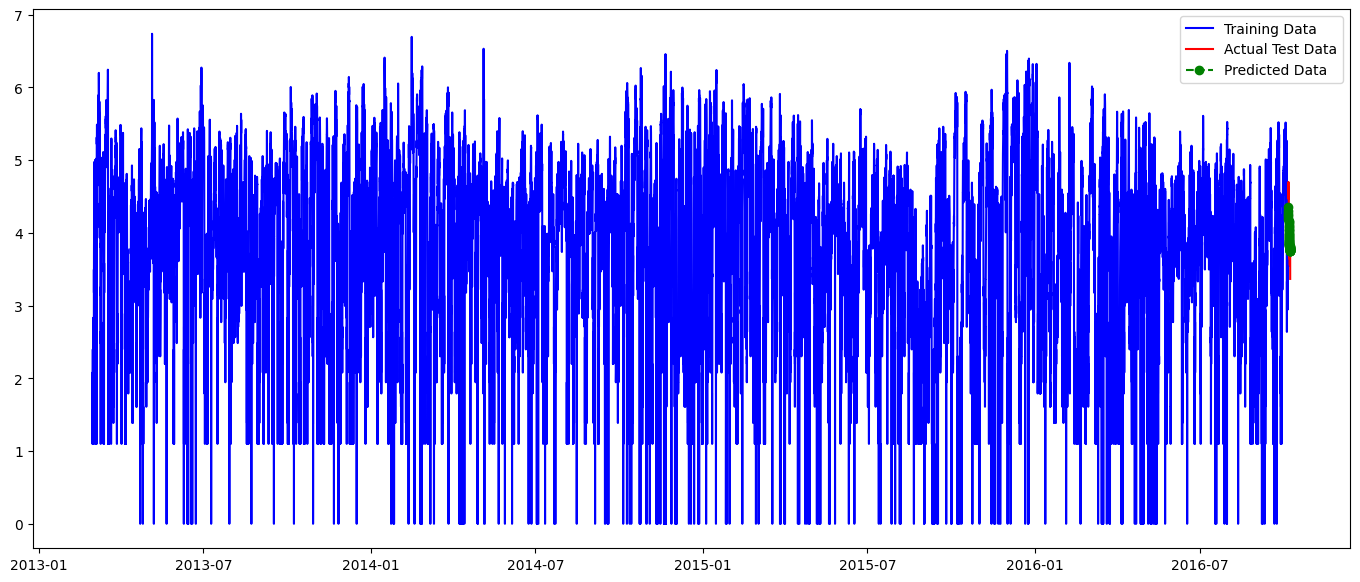

In [ ]:
plt.figure(figsize=(17,7))
plt.plot(train_ar, 'green', color='blue', label='Training Data')
plt.plot(test_ar.index[:50], test_ar[:50], color='red', label='Actual Test Data')
# Ensure predictions array has the correct length and values
predictions = model_fit.predict(start=len(train_ar), end=len(train_ar) + 49) # Predict for the next 50 data points
plt.plot(test_ar.index[:50], predictions, color='green', marker='o', linestyle='dashed', label='Predicted Data')
plt.legend();

# Report Analysis
### 1. *Comment on the trend and seasonality of the time series data:*

Based on the seasonal decomposition plots (outputs from cells [16] and [17]), we can observe:
- Trend: There's a gradual fluctuating pattern in PM2.5 levels over time, with no consistent upward or downward trend
- Seasonality: The data shows clear seasonal patterns that repeat approximately every 12 months
- The residual component shows considerable variation, indicating high day-to-day volatility in air quality

### 2. *Comment on Dickey Fuller test analysis:*

From cell [24], we can see:
- ADF Statistic: -21.883699
- p-value: 0.000000 (extremely small)
- Critical values at different significance levels:

  1%: -3.431

  5%: -2.862

  10%: -2.567

The test indicates the time series is stationary because:
- The p-value is less than 0.05 (significant)
- The ADF statistic (-21.88) is more negative than all critical values
This means the data has consistent statistical properties over time, making it suitable for forecasting.

### *3. Is the air quality becoming poorer across the years?*
Looking at the time series plot (cell [14]):
- There isn't a clear long-term deterioration in air quality
- PM2.5 levels show periodic highs and lows
- The baseline levels remain relatively consistent across years
- Extreme spikes occur periodically but don't show an increasing trend

### *4. Spikes in poor air quality:*
From the plots and correlation analysis (cells [7], [9], [11]):
- Regular spikes appear in winter months
- Possible reasons for spikes:
  - Higher correlation with CO and PM10 suggests increased pollution from heating and vehicle emissions
  - Temperature inversions in winter trapping pollutants
  - Seasonal industrial activities
  - Increased energy consumption during colder months